In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [123]:
# Генерація випадкових даних
np.random.seed(3)
n_samples = 100
n_features = 3

data = np.random.normal(10000, 99999, size=(n_samples, n_features))
columns = ['Feature1', 'Feature2', 'Feature3']
df = pd.DataFrame(data, columns=columns)
cl = np.random.randint(2, size=(n_samples))
df['y'] = cl
df.to_csv('випадкові_дані.csv', index=False)

In [124]:
data = pd.read_csv('випадкові_дані.csv')
data

,Feature1,Feature2,Feature3,y
0,188861.058715,53650.548541,19649.650310,1
1,-176347.406844,-17738.542863,-25475.543168,0
2,1725.934593,-52699.440682,5618.226921,0
3,-37721.325818,-121385.161472,98461.353428,0
4,98130.922903,180955.596792,15003.314184,0
...,...,...,...,...
95,241583.543866,-10828.133525,8502.696391,1
96,38755.477479,136407.310952,199688.198679,0
97,-110579.073278,-51510.241333,-96214.550187,0
98,-101277.002263,-153927.985435,46279.985818,0


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    float64
 1   Feature2  100 non-null    float64
 2   Feature3  100 non-null    float64
 3   y         100 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [126]:
data.describe()

,Feature1,Feature2,Feature3,y
count,100.000000,100.000000,100.000000,100.000000
mean,19153.318957,8171.576846,17213.246288,0.460000
std,99248.500014,109951.483040,98298.612067,0.500908
min,-214823.528500,-281570.859442,-231905.898235,0.000000
25%,-48920.957723,-62694.671812,-50958.385744,0.000000
50%,-273.234972,-151.572692,17759.181517,0.000000
75%,77692.343055,79440.325572,94724.632037,1.000000
max,291185.025622,255756.305041,277608.570653,1.000000


In [128]:
X = data.drop('y', axis=1)
y = data['y']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

LogisticRegression()

In [131]:
y_pred = log_regression.predict(X_test)

In [133]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) #точність класифікованих прикладів в загальній кількості прикладів
print("Precision: ", metrics.precision_score(y_test, y_pred)) #точність класифікованих позитивні приклади
print("Recall: ", metrics.recall_score(y_test, y_pred)) #повнота, наскільки ефективно модель виявляє всі позитивні приклади
print("F1: ", metrics.f1_score(y_test, y_pred, average = None)) #оцінка, середнє гармонічне точності та повноти

Accuracy: 0.43333333333333335
Precision:  0.46153846153846156
Recall:  0.375
F1:  [0.4516129 0.4137931]


In [132]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 7,  7],
       [10,  6]], dtype=int64)

In [137]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.41      0.50      0.45        14
           1       0.46      0.38      0.41        16

    accuracy                           0.43        30
   macro avg       0.44      0.44      0.43        30
weighted avg       0.44      0.43      0.43        30



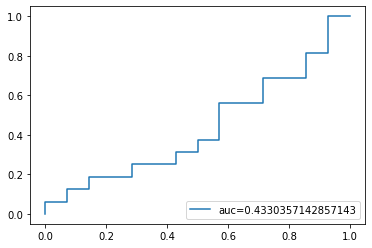

In [134]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba) #AUC-ROC крива - це метрика для оцінки якості моделі класифікації, яка дозволяє визначити, наскільки добре модель розділяє два класи (позитивний і негативний) за допомогою різних порогових значень. Ідеальна модель має AUC рівний 1, а модель, яка робить випадковий вибір, має AUC приблизно 0.5.
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()

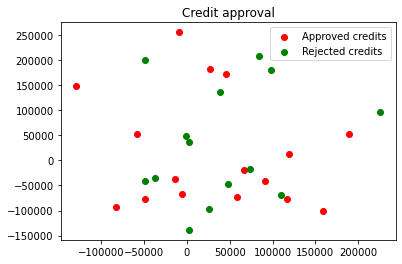

In [135]:
a_category = X_test[y_test == 1]
r_category = X_test[y_test == 0]

#plot for "approved" credits
plt.scatter(a_category.iloc[:, 0], a_category.iloc[:, 1], label='Approved credits', c='r')

#plot for "rejected" credits
plt.scatter(r_category.iloc[:, 0], r_category.iloc[:, 1], label='Rejected credits', c='g')

plt.title('Credit approval')
plt.legend(loc='best')
plt.show()

так я логіснична можель показала не дуже якісні результати, тому спробуємо інший метод

In [142]:
# BaggingClassifier
base_model = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_model)
bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Accuracy of Bagging Classifier:", bagging_accuracy)

Accuracy of Bagging Classifier: 0.43333333333333335


In [143]:
# XGBClassifier
xgb_classifier = XGBClassifier(booster='gbtree')
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy of XGBClassifier:", xgb_accuracy)

Accuracy of XGBClassifier: 0.4


In [144]:
# AdaBoostClassifier
base_model = LogisticRegression()
adaboost_classifier = AdaBoostClassifier(base_model)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("Accuracy of AdaBoost Classifier:", adaboost_accuracy)

Accuracy of AdaBoost Classifier: 0.43333333333333335


In [145]:
# Stacking Classifier
base_models = [
    ('logistic_regression', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier())
]
final_model = SVC()
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=final_model)
stacking_classifier.fit(X_train, y_train)
stacking_predictions = stacking_classifier.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Accuracy of Stacking Classifier:", stacking_accuracy)

Accuracy of Stacking Classifier: 0.5666666666666667


In [148]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RandomForest Classifier:", rf_accuracy)

Accuracy of RandomForest Classifier: 0.43333333333333335


#### у висновку, з цим набором даних найбільшу точність алгоритм опорних векторів